In [2]:
#Importing necessary packages
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Working on DataFrame (Data Manipulation)  -----  Pandas

In [3]:
#importing csv file
stock_data = pd.read_csv('INFY.csv')
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,15-May-2017,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
1,INFY,EQ,16-May-2017,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2,INFY,EQ,17-May-2017,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
3,INFY,EQ,18-May-2017,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
4,INFY,EQ,19-May-2017,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48


In [4]:
#check if date column has repeating values
#Categories in series column
stock_data.Series.unique()

array(['EQ', 'BL'], dtype=object)

In [5]:
#All rows where Series have EQ category
stock_data[stock_data.Series == 'EQ']

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,15-May-2017,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
1,INFY,EQ,16-May-2017,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2,INFY,EQ,17-May-2017,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
3,INFY,EQ,18-May-2017,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
4,INFY,EQ,19-May-2017,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,INFY,EQ,07-May-2019,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21
492,INFY,EQ,08-May-2019,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24
493,INFY,EQ,09-May-2019,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01
494,INFY,EQ,10-May-2019,721.05,720.80,726.00,715.00,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39


In [6]:
#All rows where Series have BL category
stock_data[stock_data.Series == 'BL']

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
444,INFY,BL,25-Feb-2019,1220.15,734.95,734.95,734.95,734.95,734.95,734.95,1263230,9.284109e+08,1,0,0.0
462,INFY,BL,22-Mar-2019,734.95,738.95,738.95,738.95,738.95,738.95,738.95,1727935,1.276858e+09,1,1727935,100.0


In [7]:
#Series column has data of more than one catogory
#Removing all data of Series = BL so that there are no duplicates in the csv
stock_data = stock_data[stock_data.Series == 'EQ']

#Checking if data is unique
stock_data.Series.unique()

array(['EQ'], dtype=object)

In [8]:
#Last 5 rows
stock_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
491,INFY,EQ,07-May-2019,718.40,720.40,727.90,718.7,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21
492,INFY,EQ,08-May-2019,724.55,721.00,726.00,716.5,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24
493,INFY,EQ,09-May-2019,719.35,719.15,730.30,715.8,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01
494,INFY,EQ,10-May-2019,721.05,720.80,726.00,715.0,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39
495,INFY,EQ,13-May-2019,716.85,716.55,726.45,712.1,718.00,719.70,720.09,6808993,4.903098e+09,201194,4745909,69.70


In [9]:
#Analyse the data type of each column in stock_data dataframe
stock_data.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

In [10]:
#Changing datatype from object to datetime64(ns) of 'Date' column
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [11]:
#Create a Year column in stock_data
stock_data['Year'] = pd.DatetimeIndex(stock_data.Date).year
#Create a Month column in stock_data
stock_data['Month'] = pd.DatetimeIndex(stock_data.Date).month
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5


In [12]:
#Adding a column of Daily_Per_Change to calculate daily change in percentages i.e. 
#the percentage change between 2 consecutive day's closing prices using Pandas in-built function   'pct_change()'

stock_data['Daily_Per_Change'] = stock_data['Close Price'].pct_change()
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,NaN
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.003626
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.002304
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.009393
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.003951


In [13]:
#Since there is no prior day to day 0 so the entry is filled with NaN
stock_data['Daily_Per_Change'] = stock_data['Close Price'].pct_change().fillna(0)*100
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,0.000000
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.362566
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.230366
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.939337
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.395113


In [14]:
#Add another column 'Trend' whose values are
#  --'Slight or No change' for 'Daily_Perc_Change' in between -0.5 and 0.5
#  --'Slight Positive' for 'Daily_Perc_Change' in between 0.5 and 1
#  --'Slight Negative' for 'Daily_Perc_Change' in between -0.5 and -1
#  --'Positive' for 'Daily_Perc_Change' in between 1 and 3
#  --'Negative' for 'Daily_Perc_Change' in between -1 and -3
#  --'Among Top Gainers' for 'Daily_Perc_Change' in between 3 and 7
#  --'Among Top Losers' for 'Daily_Perc_Change' in between -3 and -7
#  --'Bull Run' for 'Daily_Perc_Change' >7
#  --'Bear Drop' for 'Daily_Perc_Change' <-7
category_bins = [-pd.np.inf, -7, -3, -1, -0.5, 0.5, 1, 3, 7, pd.np.inf]
category_bins

[-inf, -7, -3, -1, -0.5, 0.5, 1, 3, 7, inf]

In [15]:
category_labels = ['Bear Drop','Among Top Losers','Negative','Slight Negative','Slight or No Change','Slight Positive',
                   'Positive','Among Top Gainers','Bull Run']
category_labels

['Bear Drop',
 'Among Top Losers',
 'Negative',
 'Slight Negative',
 'Slight or No Change',
 'Slight Positive',
 'Positive',
 'Among Top Gainers',
 'Bull Run']

In [16]:
stock_data['Trend'] = pd.cut(stock_data['Daily_Per_Change'], bins=category_bins, labels=category_labels, include_lowest=True)
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,0.000000,Slight or No Change
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.362566,Slight or No Change
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.230366,Slight or No Change
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.939337,Slight Positive
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.395113,Slight or No Change


# Data Visualization

In [17]:
#Convert the Date column to the index of the dataframe
stock_data = stock_data.set_index('Date')
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,0.000000,Slight or No Change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.362566,Slight or No Change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.230366,Slight or No Change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.939337,Slight Positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.395113,Slight or No Change


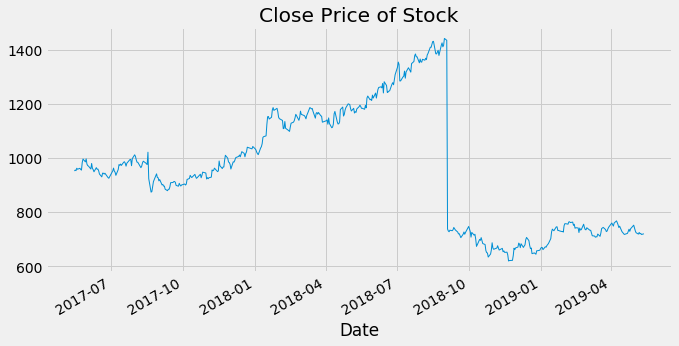

In [18]:
#Plottting the closing price of each of the days for the entire time frame to get an idea of what 
#the general outlook of the stock is.
#Plot the closing price of each of the days
# Using the fivethirtyeight matplotlib theme
plt.style.use('fivethirtyeight')
stock_data.plot(y='Close Price', title='Close Price of Stock', grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()

In [19]:
#Look for drastic change in above pattern
drastic_change = stock_data[(stock_data.Month==9) & (stock_data.Year==2018)].head(2)
drastic_change.style.apply(lambda x:['background: #d65f5f' if x.name=='Close Price' else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2018-09-03 00:00:00,INFY,EQ,1441.100000,1449.000000,1467.900000,1430.000000,1436.200000,1434.250000,1451.300000,5488164,7964966272.700000,134643,3571594,65.080000,2018,9,-0.475331,Slight or No Change
2018-09-04 00:00:00,INFY,EQ,1434.250000,722.000000,748.500000,716.000000,733.000000,737.150000,739.040000,15370124,11359156598.750000,258728,6954062,45.240000,2018,9,-48.603800,Bear Drop


### Within a single day "Closing Price" of Infosys's stock Suddenly goes down to half of it's previous price

### Possible reasons for drastic change:

###### -->Less buyers and more sellers who are willing to sell at a lower price.
###### -->Less performance of the company.
###### -->Employees are not happy is what I feel, which boils down to not performing well, hence resulting less costumer satisfaction.
###### -->Reduced confidence of investor in the future of the company.
###### -->Their quarterly results are out and it has really reached lower marks.
###### -->So many block deal.
###### -->Promoters holding is decreasing.

In [20]:
stock_data[stock_data.Daily_Per_Change==min(stock_data.Daily_Per_Change)]

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2018-09-04,INFY,EQ,1434.25,722.0,748.5,716.0,733.0,737.15,739.04,15370124,1.135916e+10,258728,6954062,45.24,2018,9,-48.6038,Bear Drop


In [21]:
stock_data[stock_data.Daily_Per_Change==max(stock_data.Daily_Per_Change)]

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-08-17,INFY,EQ,975.2,1005.0,1029.25,998.05,1021.05,1020.85,1012.61,12892130,1.305476e+10,219380,8130105,63.06,2017,8,4.681091,Among Top Gainers


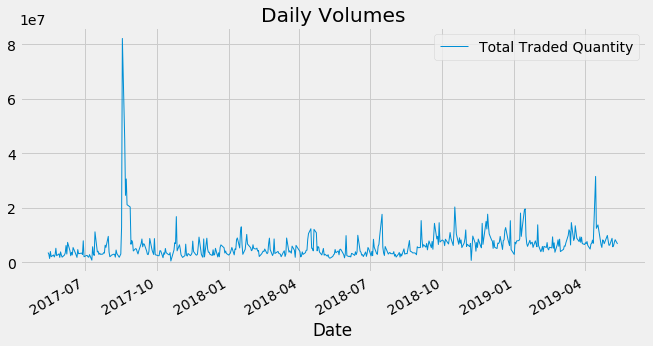

In [22]:
#Plot the daily volumes   ------   Total Traded Quantity
stock_data.plot(y='Total Traded Quantity', title='Daily Volumes', grid=True, linewidth=1, figsize=(10, 5))
plt.show()

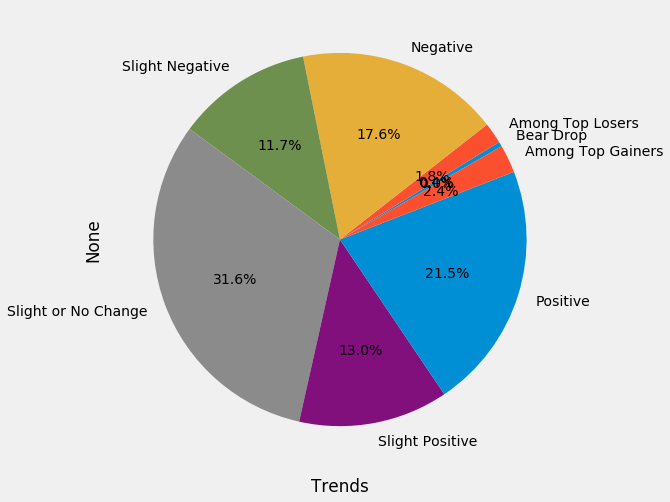

In [23]:
#Grouping stock data 'Trend' wise
trendwise = stock_data.groupby('Trend')
#Plot a pie chart for all the 'Trend'
trendwise.size().plot.pie(figsize=(8,8), autopct="%1.1f%%", startangle=30, radius=1)
plt.xlabel("Trends")
plt.show()

In [24]:
#BAR plot of total values of the 'Total Traded Quantity' by Trend type.
mean_median_sum = trendwise['Total Traded Quantity'].agg(['mean', 'median', 'sum'])
mean_median_sum

,mean,median,sum
Trend,,,
Bear Drop,4.878630e+07,48786302.0,97572604
Among Top Losers,1.463854e+07,10985897.0,131746836
Negative,5.634151e+06,5088554.0,490171179
Slight Negative,5.454672e+06,4616803.0,316370979
Slight or No Change,4.647983e+06,4043539.5,725085416
Slight Positive,5.848807e+06,5301784.0,374323658
Positive,6.655530e+06,5523811.5,705486215
Among Top Gainers,1.259063e+07,12042170.5,151087534
Bull Run,NaN,NaN,0


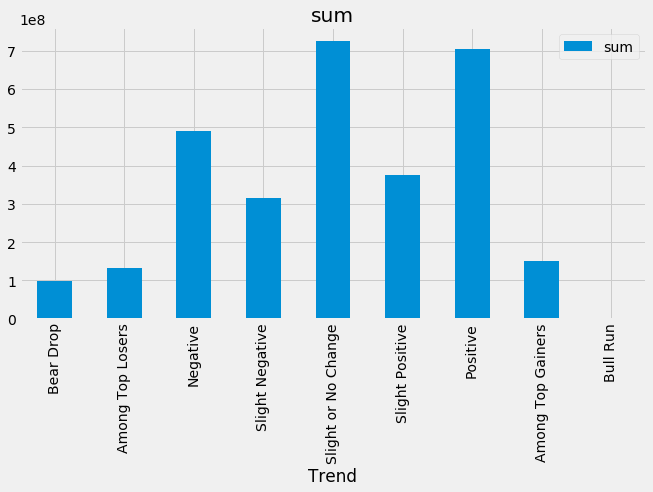

In [25]:
#Bar plot of sum w.r.t to Trends
mean_median_sum[['sum']].plot(kind='bar', subplots=True, figsize=(10,5))
plt.show()

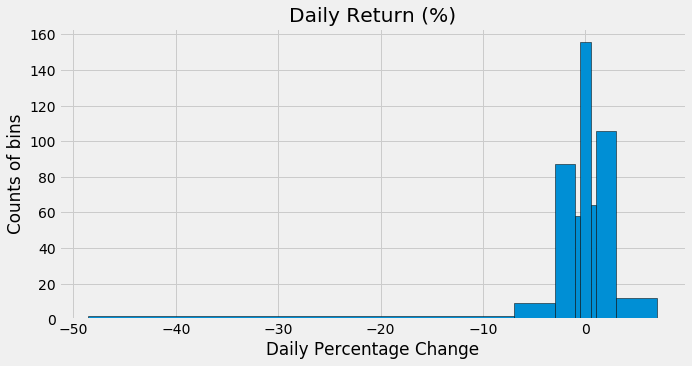

In [26]:
#Plot the daily return (percentage) distribution as a histogram.
#v = stock_data.Daily_Per_Change.min()
category_bins = [stock_data.Daily_Per_Change.min(), -7, -3, -1, -0.5, 0.5, 1, 3, 7]
stock_data.Daily_Per_Change.hist(bins=category_bins, edgecolor='k', log=False, figsize=(10,5), rwidth=1)
plt.title('Daily Return (%)')
plt.ylabel('Counts of bins')
plt.xlabel('Daily Percentage Change')
plt.show()

### To check correlation between different stocks----->5 stocks        As a Portfolio

In [27]:
#Load any 5 stocks into 5 dataframes.
lt_stock = pd.read_csv('LT.csv')
pnb_stock = pd.read_csv('PNB.csv')
suzlon_stock = pd.read_csv('SUZLON.csv')
tatapow_stock = pd.read_csv('TATAPOWER.csv')
tatachem_stock = pd.read_csv('TATACHEM.csv')

In [28]:
#Retain only rows for which ‘Series’ column has value ‘EQ’ and also reset the number of index
lt_stock = lt_stock[lt_stock.Series=='EQ'].reset_index(drop=True)
pnb_stock = pnb_stock[pnb_stock.Series=='EQ'].reset_index(drop=True)
suzlon_stock = suzlon_stock[suzlon_stock.Series=='EQ'].reset_index(drop=True)
tatapow_stock = tatapow_stock[tatapow_stock.Series=='EQ'].reset_index(drop=True)
tatachem_stock = tatachem_stock[tatachem_stock.Series=='EQ'].reset_index(drop=True)

In [29]:
close_price_stock = pd.concat({
    lt_stock.Symbol[0]:lt_stock['Close Price'],
    pnb_stock.Symbol[0]:pnb_stock['Close Price'],
    suzlon_stock.Symbol[0]:suzlon_stock['Close Price'],
    tatapow_stock.Symbol[0]:tatapow_stock['Close Price'],
    tatachem_stock.Symbol[0]:tatachem_stock['Close Price']
}, axis=1)
close_price_stock.head()

,LT,PNB,SUZLON,TATAPOWER,TATACHEM
0,1742.40,166.80,19.6,83.55,629.80
1,1740.70,174.15,19.7,83.85,643.90
2,1755.45,165.05,19.9,85.35,638.10
3,1722.60,158.50,20.0,83.75,624.90
4,1724.55,155.20,20.6,84.15,616.45


In [30]:
#Create a percentage change dataframe and drop NaN
perc_change = close_price_stock.pct_change().dropna()
perc_change.head()

,LT,PNB,SUZLON,TATAPOWER,TATACHEM
1,-0.000976,0.044065,0.005102,0.003591,0.022388
2,0.008474,-0.052254,0.010152,0.017889,-0.009008
3,-0.018713,-0.039685,0.005025,-0.018746,-0.020686
4,0.001132,-0.020820,0.030000,0.004776,-0.013522
5,0.015888,-0.027384,-0.009709,-0.024955,-0.028469


In [31]:
#Analyse the correlation between the percentage changes in the five stocks
perc_change.corr()

,LT,PNB,SUZLON,TATAPOWER,TATACHEM
LT,1.000000,0.237717,0.137295,0.208746,0.184083
PNB,0.237717,1.000000,0.278037,0.276993,0.288115
SUZLON,0.137295,0.278037,1.000000,0.328770,0.233207
TATAPOWER,0.208746,0.276993,0.328770,1.000000,0.325402
TATACHEM,0.184083,0.288115,0.233207,0.325402,1.000000


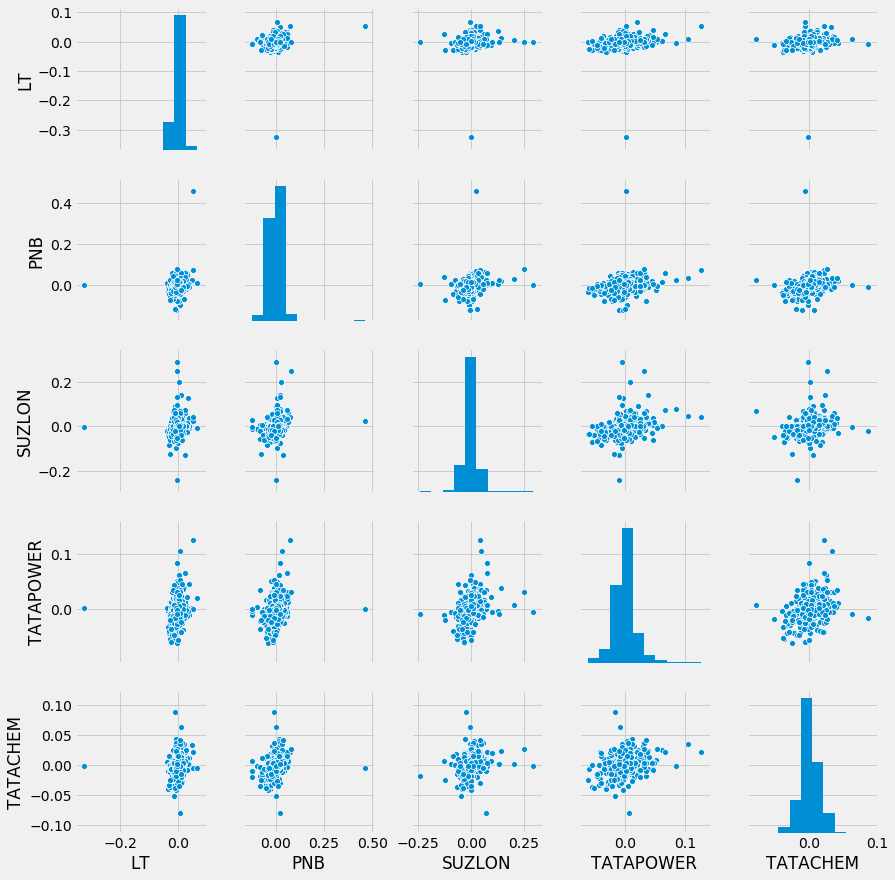

In [32]:
#Correlation between different daily percentage change between different company
sns.pairplot(perc_change)
plt.show()

##### There is no correlation between stocks of any two companies, not even TATAPOWER and TATACHEM

# Classification Done on data

In [33]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,0.000000,Slight or No Change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.362566,Slight or No Change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.230366,Slight or No Change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.939337,Slight Positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.395113,Slight or No Change


In [34]:
#Adding Bollinger Bands Columns
rolling_avg = stock_data['Close Price'].rolling(window=14).mean()
rolling_std = stock_data['Close Price'].rolling(window=14).std()

stock_data['lower'] = rolling_avg-2*rolling_std
stock_data['avg'] = rolling_avg
stock_data['upper'] = rolling_avg+2*rolling_std
stock_data.head(20)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend,lower,avg,upper
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,...,75335,3052819,83.67,2017,5,0.000000,Slight or No Change,NaN,NaN,NaN
2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,...,71808,1858063,60.62,2017,5,0.362566,Slight or No Change,NaN,NaN,NaN
2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,...,75429,792251,54.35,2017,5,-0.230366,Slight or No Change,NaN,NaN,NaN
2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,...,120990,2309450,57.32,2017,5,0.939337,Slight Positive,NaN,NaN,NaN
2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,...,88897,1457747,68.48,2017,5,-0.395113,Slight or No Change,NaN,NaN,NaN
2017-05-22,INFY,EQ,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,...,99616,2034031,73.92,2017,5,0.365364,Slight or No Change,NaN,NaN,NaN
2017-05-23,INFY,EQ,961.45,964.65,967.00,954.10,957.50,957.30,960.16,2019991,...,80122,1436389,71.11,2017,5,-0.431640,Slight or No Change,NaN,NaN,NaN
2017-05-24,INFY,EQ,957.30,960.00,965.50,949.60,957.00,954.80,958.37,2818143,...,56898,1913750,67.91,2017,5,-0.261151,Slight or No Change,NaN,NaN,NaN
2017-05-25,INFY,EQ,954.80,961.00,986.60,961.00,981.00,983.30,978.16,5219257,...,76160,4108984,78.73,2017,5,2.984918,Positive,NaN,NaN,NaN


In [35]:
stock_data.dropna(inplace=True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend,lower,avg,upper
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,INFY,EQ,977.05,969.3,979.70,958.55,971.25,971.40,969.49,2754303,...,81421,1822506,66.17,2017,6,-0.578271,Slight Negative,936.708789,968.671429,1000.634068
2017-06-02,INFY,EQ,971.40,973.4,975.45,964.20,966.00,969.45,968.76,1958983,...,48927,1396644,71.29,2017,6,-0.200741,Slight or No Change,939.543472,969.950000,1000.356528
2017-06-05,INFY,EQ,969.45,970.0,972.00,957.05,959.00,958.75,961.71,2731349,...,83794,1941199,71.07,2017,6,-1.103719,Negative,940.316774,970.217857,1000.118940
2017-06-06,INFY,EQ,958.75,965.0,987.50,964.40,980.00,979.35,980.08,3504343,...,83178,2018029,57.59,2017,6,2.148631,Positive,943.638076,972.114286,1000.590495
2017-06-07,INFY,EQ,979.35,985.0,988.90,945.00,959.30,961.30,963.75,6227523,...,139990,2519343,40.45,2017,6,-1.843059,Negative,943.554569,972.082143,1000.609717


In [36]:
#Create a new column Call, whose entries are -
#'Buy' if the stock price is below the lower Bollinger band
#'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
#'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
#'Short' if the stock price is above the upper Bollinger band

def classifying_call(close,lower,avg,upper):
    if close <= lower:
        return 'Buy'
    if (close > lower) and (close <= avg):
        return 'Hold Buy/Liquidate Short'
    elif (close > avg) and (close <= upper):
        return 'Hold Short/Liquidate Buy'
    elif close > upper:
        return 'Short'

In [37]:
stock_data["Call"] = stock_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], 
                                                                       record['upper']), axis = 1)

In [38]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Daily_Per_Change,Trend,lower,avg,upper,Call
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,INFY,EQ,977.05,969.3,979.70,958.55,971.25,971.40,969.49,2754303,...,1822506,66.17,2017,6,-0.578271,Slight Negative,936.708789,968.671429,1000.634068,Hold Short/Liquidate Buy
2017-06-02,INFY,EQ,971.40,973.4,975.45,964.20,966.00,969.45,968.76,1958983,...,1396644,71.29,2017,6,-0.200741,Slight or No Change,939.543472,969.950000,1000.356528,Hold Buy/Liquidate Short
2017-06-05,INFY,EQ,969.45,970.0,972.00,957.05,959.00,958.75,961.71,2731349,...,1941199,71.07,2017,6,-1.103719,Negative,940.316774,970.217857,1000.118940,Hold Buy/Liquidate Short
2017-06-06,INFY,EQ,958.75,965.0,987.50,964.40,980.00,979.35,980.08,3504343,...,2018029,57.59,2017,6,2.148631,Positive,943.638076,972.114286,1000.590495,Hold Short/Liquidate Buy
2017-06-07,INFY,EQ,979.35,985.0,988.90,945.00,959.30,961.30,963.75,6227523,...,2519343,40.45,2017,6,-1.843059,Negative,943.554569,972.082143,1000.609717,Hold Buy/Liquidate Short


In [39]:
stock_data.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy',
       'Short'], dtype=object)

In [40]:
stock_data.Call.value_counts()

Hold Short/Liquidate Buy    250
Hold Buy/Liquidate Short    189
Short                        28
Buy                          14
Name: Call, dtype: int64

In [41]:
#Training Different Classification models with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. 
#Check their accuracy on a test set and compare the accuracy for each

#Training Testing Split
Input = stock_data[['lower','avg','upper','Close Price']]
Input.head()

,lower,avg,upper,Close Price
Date,,,,
2017-06-01,936.708789,968.671429,1000.634068,971.40
2017-06-02,939.543472,969.950000,1000.356528,969.45
2017-06-05,940.316774,970.217857,1000.118940,958.75
2017-06-06,943.638076,972.114286,1000.590495,979.35
2017-06-07,943.554569,972.082143,1000.609717,961.30


In [42]:
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(stock_data.Call)
Output = pd.DataFrame(numbered_label)
Output.head()

,0
0,2
1,1
2,1
3,2
4,1


In [43]:
#Train and Test Split
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

### Training Different models
### Different Classification Algorithm
###### ---Naive bayes (Linear Classifier)
###### ---Logistic Regression (Linear Classifier)
###### ---K-Nearest Neighbour (KNN)
###### ---Decision Tree

In [44]:
classifers_train_test = pd.DataFrame(columns=["Classifier","Train_ACCURACY", "Test_ACCURACY"])

In [45]:
#Naive bayes
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
training_accuracy = gaussian_classifier.score(X_train, y_train).round(2)
training_accuracy

0.58

In [47]:
testing_accuracy = gaussian_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.56

In [48]:
classifers_train_test.loc[0] = ["Naive Bayes", training_accuracy, testing_accuracy]

In [49]:
#Logistic Regression
lr = LogisticRegression(max_iter=10000,class_weight='balanced', multi_class="ovr", solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
training_accuracy = lr.score(X_train, y_train).round(2)
training_accuracy

0.98

In [51]:
testing_accuracy = lr.score(X_test, y_test).round(2)
testing_accuracy

0.98

In [52]:
classifers_train_test.loc[1] = ["Logistic Regression", training_accuracy, testing_accuracy]

In [53]:
#KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
training_accuracy = knn_classifier.score(X_train, y_train).round(2)
training_accuracy

0.91

In [55]:
testing_accuracy = knn_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.79

In [56]:
classifers_train_test.loc[2] = ["KNN", training_accuracy, testing_accuracy]

In [57]:
#Decision Tree Classifier
dc_classifier = DecisionTreeClassifier(random_state=0, max_depth=2)
dc_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [58]:
training_accuracy = dc_classifier.score(X_train, y_train).round(2)
training_accuracy

0.61

In [59]:
testing_accuracy = dc_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.53

In [60]:
classifers_train_test.loc[3] = ["Decision Tree", training_accuracy, testing_accuracy]

In [61]:
#Accuracy of all models
classifers_train_test

,Classifier,Train_ACCURACY,Test_ACCURACY
0,Naive Bayes,0.58,0.56
1,Logistic Regression,0.98,0.98
2,KNN,0.91,0.79
3,Decision Tree,0.61,0.53


### Logistic Regression gives the best accuracy and performance among all the models.
### Decision Tree gives the worst accuracy and performance among all the models.

# Clustering    ----K-Means

In [62]:
#In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is 
#common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high 
#correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed 
#into a category.
cp_30 = pd.DataFrame([])

In [63]:
#Create a dataframe with the closing prices of 30 different stocks, with 10 from each of the capitals
#Iterating over all 30 stocks
for i in os.listdir("./30_stock_files/"):
    df = pd.read_csv("./30_stock_files/"+str(i))
    
    #Taking rows only with Series = 'EQ'
    df = df[df.Series=='EQ'].reset_index(drop=True)
    
    #Taking Close Price column from each stock
    cp_30[df.Symbol[0]] = df['Close Price']
    
cp_30.head()

,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
0,231.90,216.05,1148.05,341.15,1332.95,266.65,431.40,1553.40,3515.45,983.25,...,772.80,563.90,32.00,1344.10,162.65,912.20,83.55,2365.10,1169.70,431.85
1,234.40,214.90,1142.85,347.00,1347.75,266.10,424.45,1559.65,3619.40,1000.40,...,785.00,562.60,32.10,1356.30,158.60,894.70,83.85,2429.15,1177.00,432.45
2,237.35,217.00,1154.95,349.85,1324.80,264.85,429.00,1557.15,3645.95,1009.40,...,783.65,564.25,31.95,1353.10,158.25,887.05,85.35,2455.35,1188.00,430.20
3,232.65,209.65,1151.35,334.10,1314.55,260.35,417.95,1557.10,3592.05,990.25,...,746.95,552.15,31.05,1327.35,157.40,871.35,83.75,2536.20,1156.90,414.10
4,234.65,206.25,1123.15,336.20,1289.15,254.05,404.20,1561.25,3571.65,1008.00,...,723.10,555.45,30.55,1318.85,151.90,852.40,84.15,2507.15,1161.65,415.75


In [64]:
#Calculating average annual percentage return and volatility of all 30 stocks over a theoretical one year period
one_year = cp_30.tail(252).reset_index(drop=True)
one_year.tail()

,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
247,195.20,118.10,1387.80,557.75,3017.05,163.15,116.60,2322.35,2527.35,1697.50,...,808.95,665.95,2.1,1343.50,340.50,551.10,64.35,2151.95,2000.45,601.45
248,191.75,115.45,1385.70,534.45,2921.30,161.30,116.30,2307.25,2499.70,1688.70,...,807.10,652.80,2.2,1299.45,338.10,528.90,64.50,2152.85,1956.70,576.65
249,185.30,115.30,1354.20,531.85,2971.35,160.50,116.00,2290.90,2537.75,1703.75,...,805.30,661.85,2.3,1256.45,332.95,540.70,64.40,2172.55,1930.10,574.10
250,190.95,117.45,1341.05,540.90,2922.85,160.50,116.40,2296.50,2507.30,1687.45,...,804.40,675.00,2.4,1251.15,332.85,541.15,63.80,2135.80,1820.65,580.05
251,186.20,117.15,1332.50,541.55,2931.85,162.85,110.95,2287.20,2510.75,1702.00,...,779.35,659.50,2.3,1232.05,339.80,535.65,62.60,2128.75,1706.75,572.20


In [65]:
#annual average percentage return of all 30 stocks
per_return = one_year.pct_change(fill_method='ffill').dropna()*100
avg_per_return = per_return.mean()
avg_per_return.head()

APOLLOTYRE   -0.152627
ASHOKA       -0.291083
ASIANPAINT    0.055553
BAJAJELEC    -0.037507
BAJFINANCE    0.206037
dtype: float64

In [66]:
#annual volatility of all 30 stocks
volatility = per_return.std()
volatility.head()

APOLLOTYRE    1.946514
ASHOKA        3.242312
ASIANPAINT    1.463245
BAJAJELEC     2.367102
BAJFINANCE    2.206760
dtype: float64

In [67]:
#Clustering the 30 stocks according to their annual mean Volatilities and Returns using K-means clustering
cluster_df = pd.DataFrame({'Returns':avg_per_return, 'Volatilities':volatility})
cluster_df

,Returns,Volatilities
APOLLOTYRE,-0.152627,1.946514
ASHOKA,-0.291083,3.242312
ASIANPAINT,0.055553,1.463245
BAJAJELEC,-0.037507,2.367102
BAJFINANCE,0.206037,2.206760
CENTURYPLY,-0.221293,2.505610
DHFL,-0.526120,5.368415
HDFCBANK,0.060881,1.013472
HEROMOTOCO,-0.134744,1.754052
HINDUNILVR,0.068739,1.327639


In [68]:
#Elbow Curve Method Procedure
# number of clusters to be tested
cluster_num = 8

# dataframe that will contain all the relevant information for each cluster size.
cluster_info = pd.DataFrame(index=pd.np.arange(2,cluster_num+1), 
                                   columns=['loss', 'score','center_returns', 'center_volatility', 'cluster_label', 'model'])

for k in range(2, cluster_num+1):
    # creating an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cluster_df)
    
    # Loss: Sum of distances of samples to their closest cluster center.
    cluster_info['loss'][k] = kmeans.inertia_
    cluster_info['center_returns'][k] = kmeans.cluster_centers_[:,0]
    cluster_info['center_volatility'][k] = kmeans.cluster_centers_[:,1]
    cluster_info['cluster_label'][k] = kmeans.labels_.astype(float)
    cluster_info['score'][k] = kmeans.score
    cluster_info['model'][k] = kmeans

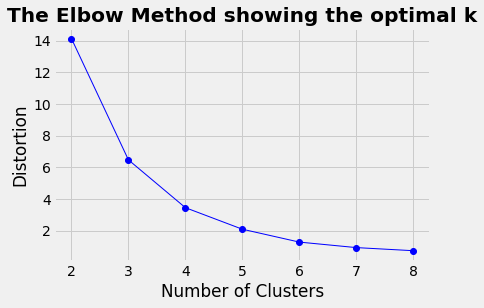

In [69]:
#Elbow Curve Graph
with plt.style.context('fivethirtyeight'):
    plt.plot(cluster_info.index.values, cluster_info.loss, 'bo-', linewidth=1)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.title('The Elbow Method showing the optimal k', fontweight='bold')
    plt.show()

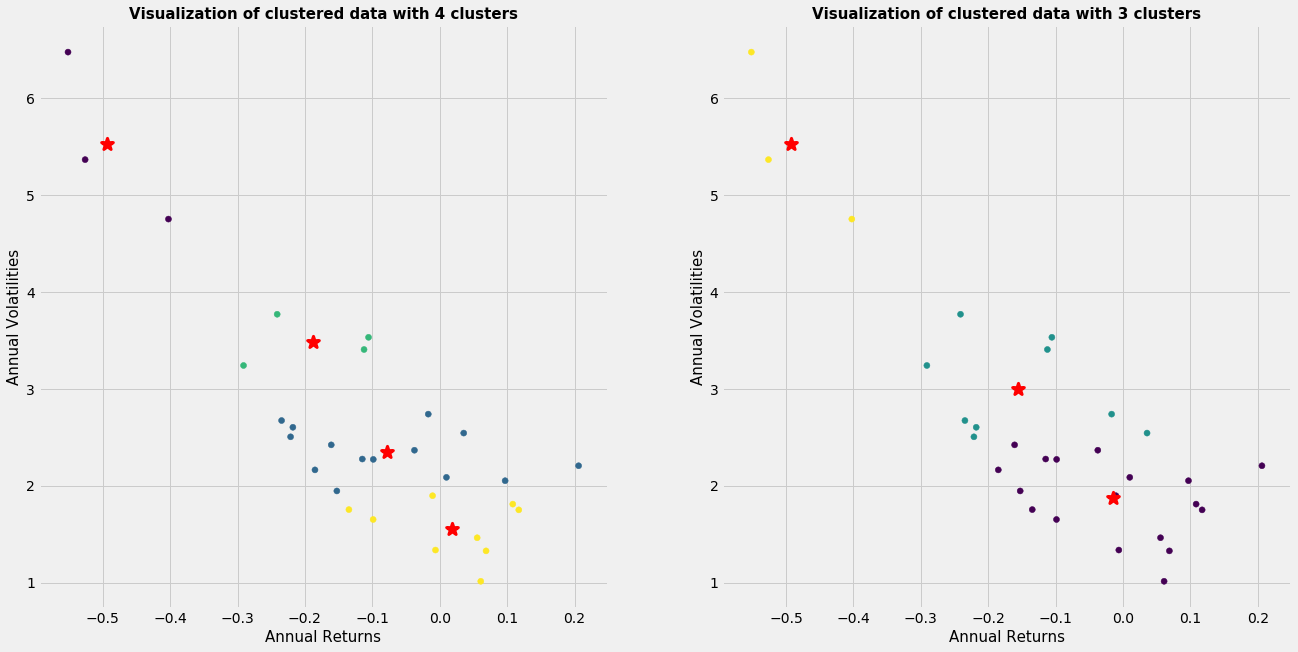

In [70]:
#From above graph, it looks like 3 or 4 would be better number of cluster.
#Plot scatter plot for 3 and 4 cluster
plt.figure(figsize=(20,10))
for cluster in [4,3]:
    plt.subplot(1,2,cluster%2+1)
    plt.scatter(cluster_df.Returns, cluster_df.Volatilities, c=cluster_info.cluster_label[cluster], 
                cmap='viridis')
    plt.scatter(cluster_info.center_returns[cluster], cluster_info.center_volatility[cluster], 
                marker='*', c='r', s=150, linewidth=3)
    plt.ylabel('Annual Volatilities', fontsize=15)
    plt.xlabel('Annual Returns', fontsize=15)
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold', fontsize=15)
plt.show()

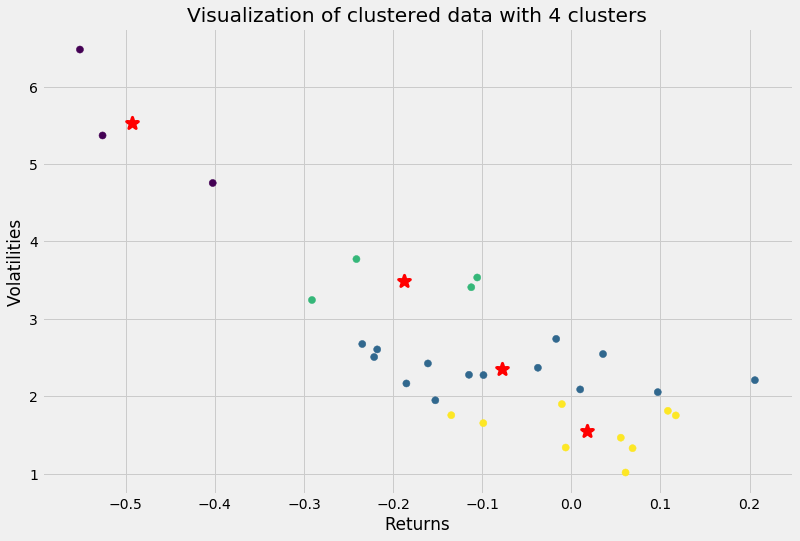

In [71]:
#So from above comparsion, 4 clustered scatter plot look much better than 3 clustered.
#Optimum Number of clusters = 4
k_optimized = 4
kmeans_optimized = cluster_info.loc[k_optimized]
cluster_df.plot(kind='scatter', x='Returns', y='Volatilities', 
                     c=kmeans_optimized.cluster_label, s=50, 
                     cmap='viridis', colorbar=False, figsize=(12,8), 
                     title='Visualization of clustered data with {} clusters'.format(k_optimized))
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='r', s=150, linewidths=3)
plt.show()

In [72]:
#Label of Stocks in Clusters
# Add Cluster number label in Clustering_data dataframe
cluster_df['label'] = cluster_info.cluster_label[k_optimized].astype(int)+1

#  separate Dataframe to show which stocks belong to the same cluster 
all_clusters = [i[1] for i in cluster_df.groupby('label')]
cluster1, cluster2, cluster3, cluster4 = all_clusters

# Display which stocks belongs to which cluster
print("STOCKS IN", "-"*50,sep='\n')
for cluster in all_clusters:
    print(f"Cluster {cluster.label[0]} : ",end=""); print(*cluster.index.values, sep=", ",end='\n\n')

STOCKS IN
--------------------------------------------------
Cluster 1 : DHFL, JETAIRWAYS, RCOM

Cluster 2 : APOLLOTYRE, BAJAJELEC, BAJFINANCE, CENTURYPLY, IDBI, LUXIND, MINDTREE, NBCC, PNB, PVR, RAYMOND, SONATSOFTW, SUNTV, TATAPOWER

Cluster 3 : ASHOKA, INFY, TCS, VENKEYS

Cluster 4 : ASIANPAINT, HDFCBANK, HEROMOTOCO, HINDUNILVR, LT, MARUTI, RBLBANK, RELIANCE, VOLTAS



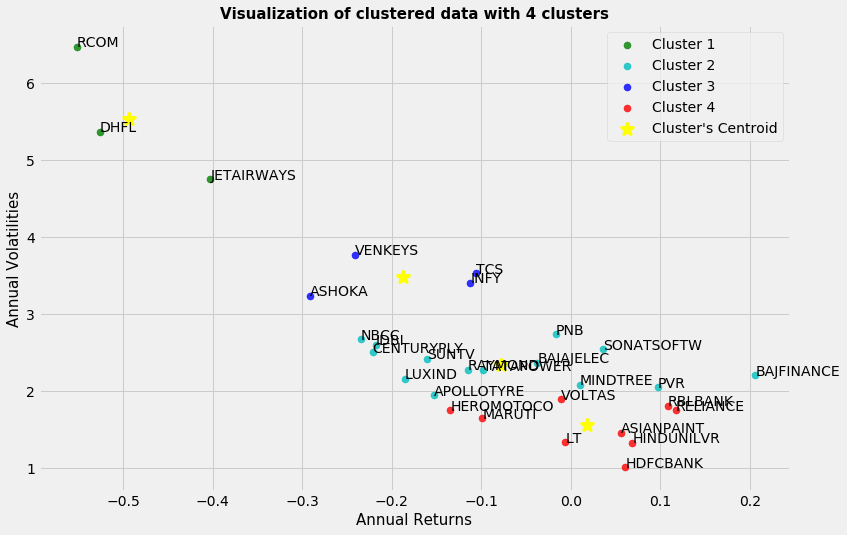

In [73]:
#Plot Clustering of Stocks
plt.figure(figsize=(12,8))
# Plot all clusters
for i in range(len(all_clusters)):
    plt.scatter(all_clusters[i].Returns, all_clusters[i].Volatilities, s=50, label=f"Cluster {i+1}", 
                c=list('gcbr')[i], alpha=0.8)

# Annotate stock name to each data point
for i in range(len(cluster_df)):
    plt.annotate(cluster_df.index[i], (cluster_df.Returns[i], cluster_df.Volatilities[i]))
    
# Plot Centriod of each cluster
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='yellow', s=150, 
            linewidth=3, label="Cluster's Centroid")

plt.title("Visualization of clustered data with 4 clusters", fontweight='bold', fontsize=15)
plt.xlabel("Annual Returns", fontsize=15)
plt.ylabel("Annual Volatilities", fontsize=15)
plt.legend()
plt.show()

#### Separate Data frame of Each Cluster

In [74]:
cluster1

,Returns,Volatilities,label
DHFL,-0.526120,5.368415,1
JETAIRWAYS,-0.402479,4.754339,1
RCOM,-0.551513,6.478758,1


In [75]:
cluster2

,Returns,Volatilities,label
APOLLOTYRE,-0.152627,1.946514,2
BAJAJELEC,-0.037507,2.367102,2
BAJFINANCE,0.206037,2.206760,2
CENTURYPLY,-0.221293,2.505610,2
IDBI,-0.217885,2.604046,2
LUXIND,-0.185099,2.164111,2
MINDTREE,0.009951,2.086993,2
NBCC,-0.234637,2.673751,2
PNB,-0.016995,2.739882,2
PVR,0.097040,2.052217,2


In [76]:
cluster3

,Returns,Volatilities,label
ASHOKA,-0.291083,3.242312,3
INFY,-0.112286,3.407303,3
TCS,-0.105631,3.533329,3
VENKEYS,-0.241175,3.771359,3


In [77]:
cluster4

,Returns,Volatilities,label
ASIANPAINT,0.055553,1.463245,4
HDFCBANK,0.060881,1.013472,4
HEROMOTOCO,-0.134744,1.754052,4
HINDUNILVR,0.068739,1.327639,4
LT,-0.006306,1.336219,4
MARUTI,-0.098799,1.651774,4
RBLBANK,0.108374,1.810614,4
RELIANCE,0.117284,1.751214,4
VOLTAS,-0.010604,1.897297,4
